train loss: 1.12e-01 | test loss: 1.07e-01 | reg: 1.56e+01 : 100%|██| 20/20 [00:04<00:00,  4.70it/s]
train loss: 6.55e-04 | test loss: 6.55e-04 | reg: 7.34e-01 : 100%|██| 50/50 [00:05<00:00,  9.41it/s]


fixing (0,0,0) with sqrt, r2=0.9997750520706177
fixing (0,1,0) with exp, r2=0.6386943459510803
fixing (1,0,0) with sin, r2=0.9994316101074219


train loss: 1.40e-02 | test loss: 1.43e-02 | reg: 7.47e-01 : 100%|██| 50/50 [00:00<00:00, 74.42it/s]


1.01*sin(109.25*sqrt(1 - 0.06*x_1) - 118.66) + 0.01

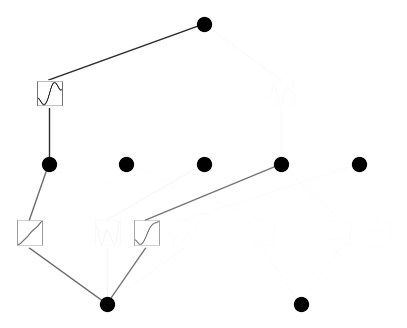

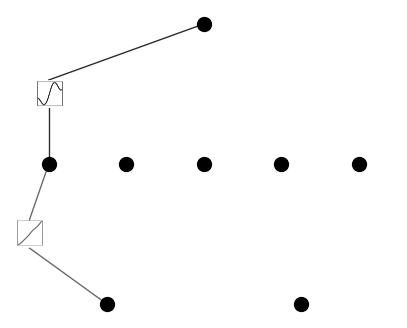

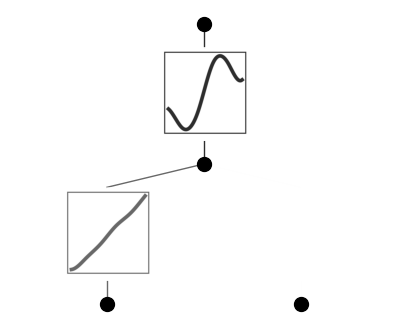

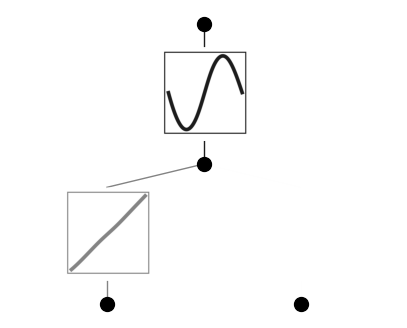

In [17]:
from kan import *


model = KAN(width=[2,5,1], grid=5, k=3, seed=0 )

# f is target function
f = lambda x: torch.sin(torch.pi*x[:,[0]]) #+ torch.cos(torch.pi*x[:,[1]]) # + torch.log(1 + x[:,[0]]**2 + x[:,[1]]**2)
#f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)


# create dataset derived from target function
dataset = create_dataset(f, n_var=2)

#lamb,lamb_entropy parameter is needed when restoring original function 
model.train(dataset, opt="LBFGS", steps=20,lamb=0.01, lamb_entropy=10.);


# iteratively fining spline function for better fitting don't use this block to restore function appropriately 

"""
grids = np.array([5,10,15,20,25])

train_losses = []
test_losses = []
steps = 50
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,10,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,10,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30)
    train_losses += results['train_loss']
    test_losses += results['test_loss']
  
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')
"""

# to restore original function and distinguish random-generating situation, we use explainability of KAN under under this line

# original trained model
model.plot()

# prune model
model.prune() 
model.plot(mask=True)

# give smaller shape
model = model.prune() 
model(dataset['train_input'])
model.plot() 

# Continue training and replot
model.train(dataset, opt="LBFGS", steps=50);
model.plot()

#automatically find target fucntion  
mode = "auto" 

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

model.train(dataset, opt="LBFGS", steps=50);
model.symbolic_formula()[0][0]

